# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Loading data

In [2]:
data = pd.read_csv('CE802_P2_Data.csv')

In [3]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.7,33.90,5.80,6.62,10.71,362.58,-1.52,165,5.52,444.56,-1.96,15.30,10,6.93,8.76,False
1496,17.7,29.40,8.00,-0.48,3.54,-102.42,1.17,100,3.76,304.56,6.78,29.25,10,7.53,12.19,True
1497,11.7,2.13,-0.92,12.12,22.65,95.58,-0.57,10,8.47,76.56,-4.76,2.34,1,1.89,NaN,True
1498,11.7,2.94,0.64,11.68,17.49,146.58,1.47,20,8.57,116.56,-5.00,2.67,1,1.48,11.55,False


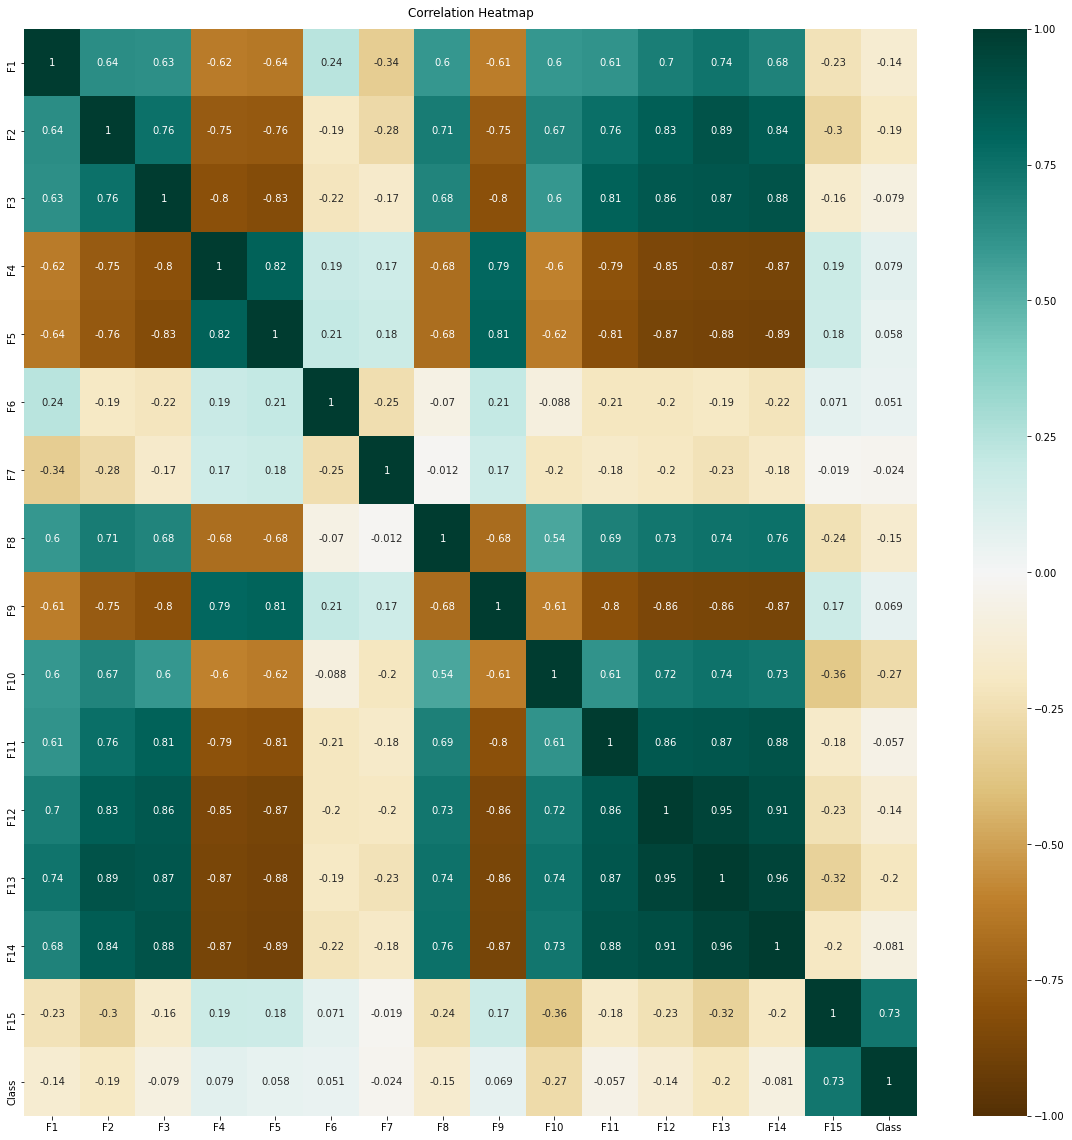

In [5]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

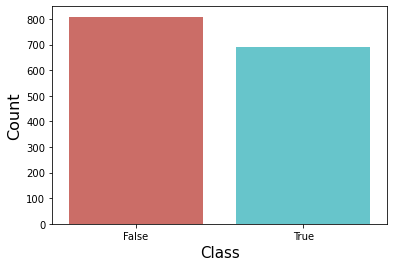

In [88]:
sns.countplot(x = 'Class',data=data,palette='hls')
plt.xlabel('Class',fontsize=15)
plt.ylabel('Count',fontsize=16)
plt.show()

In [89]:
print("total no. of false:",len(data[data['Class']==False]))
print("total no. of true:",len(data[data['Class']==True]))

total no. of false: 809
total no. of true: 691


# Prepare the data(Preprocessing)

In [4]:

x = data.loc[:, data.columns != 'Class'].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(1500, 15) (1500,)


In [5]:
np.sum(np.isnan(x),0)



array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 750])

In [6]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
imputer = imputer.fit(x)
x = imputer.transform(x)

# Implementation of DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Splitting data into test,train

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)
print("number of traning examples:",len(x_train))
print("number of test examples:",len(y_test))

number of traning examples: 1200
number of test examples: 300


# Pipeline

In [95]:
pipe_steps = [('scaler',StandardScaler()),('decsT',DecisionTreeClassifier())]
tune_params = {'decsT__criterion':['gini','entropy'],'decsT__max_depth':np.arange(3,7)}
pipeline = Pipeline(pipe_steps)
print(pipeline)


grid = GridSearchCV(pipeline, param_grid=tune_params,cv=5, n_jobs=-1)
grid.fit(x_train,y_train)
score = grid.score( x_test, y_test) 
print(score)
print(grid.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decsT', DecisionTreeClassifier())])
0.8133333333333334
{'decsT__criterion': 'gini', 'decsT__max_depth': 5}


# Final decision tree features importances

   features_name  importance
14           F15    0.548203
13           F14    0.107237
10           F11    0.099936
9            F10    0.086136
6             F7    0.052227
11           F12    0.048310
8             F9    0.040583
5             F6    0.015812
4             F5    0.001555
0             F1    0.000000
1             F2    0.000000
2             F3    0.000000
3             F4    0.000000
7             F8    0.000000
12           F13    0.000000


<BarContainer object of 15 artists>

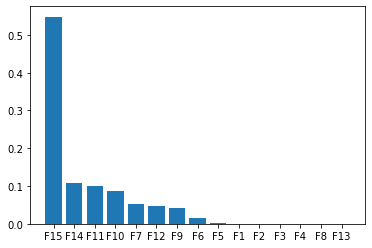

In [105]:
final_dt = DecisionTreeClassifier(criterion='gini',max_depth = 5)
final_dt.fit(x_train,y_train)
final_dt.feature_importances_

x1 = data.drop(labels='Class', axis=1)
df = pd.DataFrame({'features_name': x1.columns,'importance':final_dt.feature_importances_})
df1 = df.sort_values(by='importance',ascending=False)
print(df1)
plt.bar(df1['features_name'],df1['importance'])

# Plot of DecisionTree

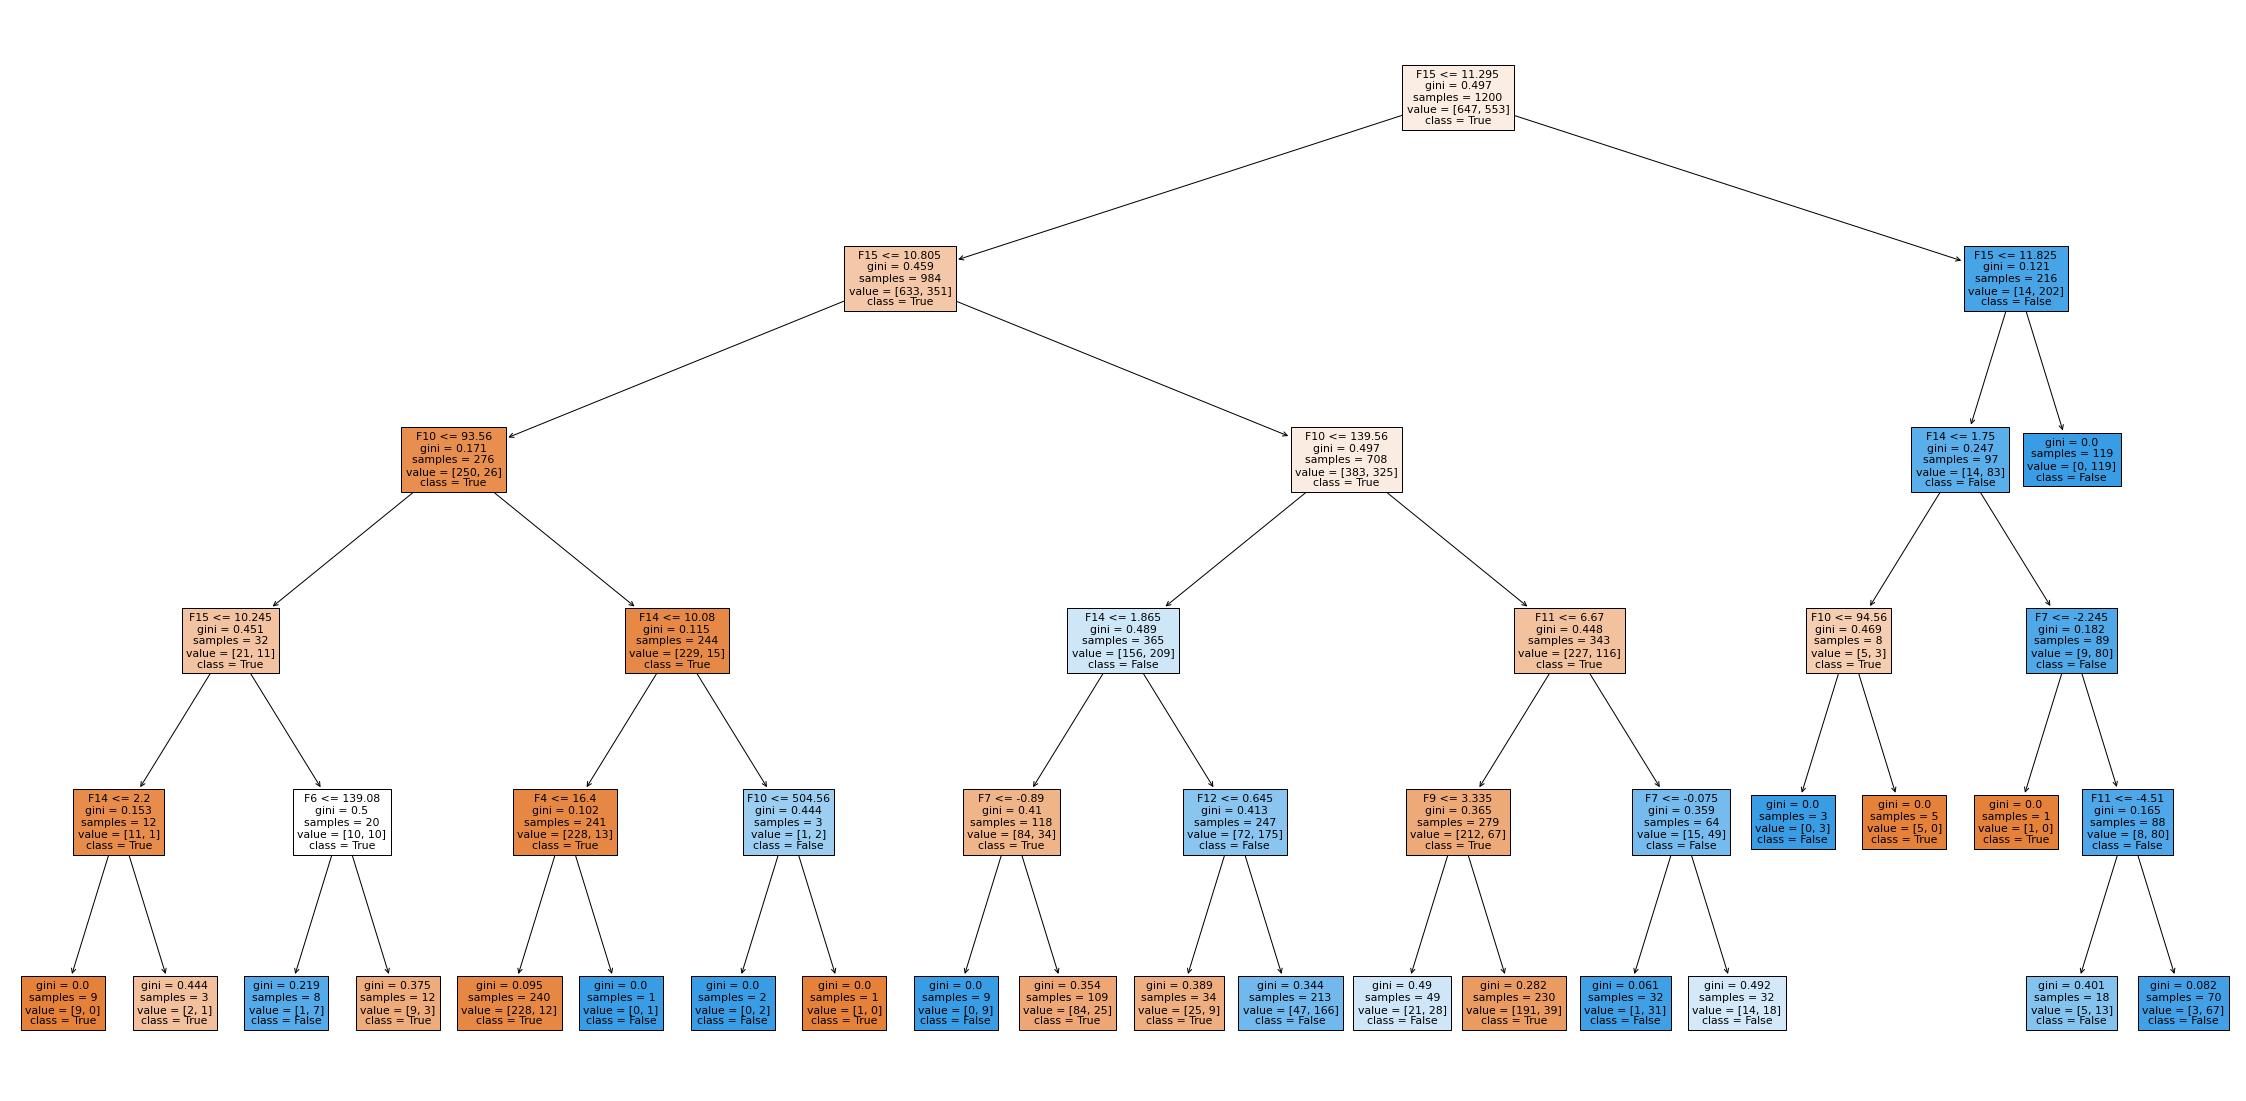

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(final_dt,filled=True,class_names=['True','False'],feature_names=x1.columns)
plt.savefig('DecisionTree')
plt.show()

# Implementation of SVM

In [9]:
from sklearn import svm

In [97]:
pipe_steps = [('scaler',StandardScaler()),('classifier',svm.SVC())]
tune_params = {'classifier__C':[0.001,0.1,10,100,10e5],'classifier__gamma':np.logspace(-3,2,6),}
pipeline = Pipeline(pipe_steps)
print(pipeline)


grid = GridSearchCV(pipeline, param_grid=tune_params,cv=5, n_jobs=-1)
grid.fit(x_train,y_train)
score = grid.score( x_test, y_test) 
print(score)
print(grid.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
0.8833333333333333
{'classifier__C': 100, 'classifier__gamma': 0.01}


In [10]:
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(x_train)
scaled_xtest = scaler.fit_transform(x_test)
final_svm = svm.SVC(C =  100, gamma =  0.01)
final_svm.fit(scaled_xtrain,y_train)

SVC(C=100, gamma=0.01)

In [10]:
sv_indices = final_svm.support_
print(len(sv_indices))
print(sv_indices)

481
[   7   19   21   22   23   25   29   31   34   36   42   44   46   47
   48   49   60   63   71   73   74   79   89   97   98  110  114  119
  120  126  129  133  139  143  148  152  155  156  161  163  179  181
  182  183  185  199  207  210  211  212  214  217  220  223  227  244
  245  252  259  269  273  279  281  283  284  286  290  293  295  299
  304  305  321  340  342  346  347  348  349  350  356  361  365  366
  370  372  378  379  387  404  417  424  428  431  433  438  441  458
  464  466  475  480  482  494  506  513  526  530  536  538  541  555
  557  568  577  578  584  588  592  594  599  607  608  617  620  629
  632  636  637  643  646  647  654  655  656  659  660  689  694  696
  699  702  704  709  710  718  742  744  752  758  761  764  771  778
  785  789  790  791  800  803  806  807  818  819  825  829  834  838
  840  844  851  855  856  860  861  862  863  886  889  892  897  920
  924  930  933  934  935  936  944  956  963  970  973  975  977  980
  

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, final_svm.predict(scaled_xtest))
print(confusion_matrix)

[[141  21]
 [ 15 123]]


# Implementation of KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn import metrics

In [16]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)



scores_list = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_x_train,y_train)
    scores_list.append(metrics.accuracy_score(y_test,knn.predict(scaled_x_test)))

Text(0, 0.5, 'accuracy')

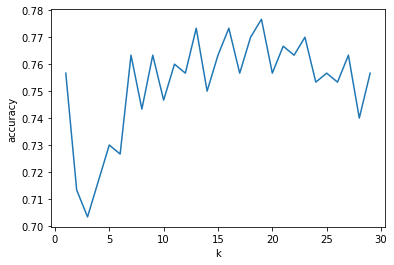

In [19]:
plt.plot(range(1,30),scores_list)
plt.xlabel('k')
plt.ylabel('accuracy')

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, knn.predict(scaled_x_test))
print(confusion_matrix)

[[142  20]
 [ 53  85]]


In [20]:
final_knn = KNeighborsClassifier(17)
final_knn.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

# Implementation of VotingClassifier

In [106]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('SVC', final_svm), ('DTree', final_dt), ('KNN', final_knn)], voting='hard')
voting_classifier.fit(scaled_xtrain, y_train)
preds = voting_classifier.predict(scaled_xtest)
acc = metrics.accuracy_score(y_test, preds)


print("Accuracy is: " + str(acc))


Accuracy is: 0.88


# Loading Test data

In [11]:
Test_data = pd.read_csv('CE802_P2_Test.csv')
Test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,27.7,20.40,-0.82,5.50,8.25,392.58,-2.05,5,6.63,124.56,4.58,19.50,10,5.88,NaN
1496,17.7,32.70,7.16,3.04,11.04,92.58,-1.71,170,3.74,414.56,1.02,16.50,10,9.33,NaN
1497,15.7,0.45,-2.90,16.96,21.33,128.58,1.84,58,9.74,112.56,-2.84,2.07,1,2.18,11.82
1498,7.7,1.74,1.60,11.24,21.39,119.58,-0.32,18,7.41,90.56,-3.10,2.67,1,1.88,NaN


# Prepare data(Preprocessing)

In [12]:
x_Test_data = Test_data.loc[:, Test_data.columns].to_numpy()

In [13]:
print(x_Test_data.shape)

(1500, 15)


In [14]:
np.sum(np.isnan(x_Test_data),0)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 750])

In [15]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
x_Test_data = imputer.fit_transform(x_Test_data)

# Scaling Data

In [16]:
scaler = StandardScaler()
scaled_xTest = scaler.fit_transform(x_Test_data)
Class = final_svm.predict(scaled_xTest)

# Adding Class column to Testdata

In [19]:
Test_data['Class'] = Class
Test_data.to_csv('CE802_P2_Test.csv')